# Titanic Data Visualization : which group have survived?
-----

### 60161051 김동현

## Description
---

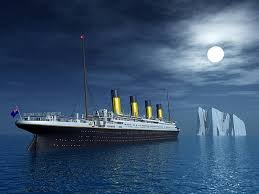

여객선 RMS 타이타닉은 1912년 4월 10일 영국의 사우샘프턴에서 출항해 프랑스의 셸부르와 아일랜드의 퀸즈타운에 기항한 후 미국 뉴욕을 향해 출항했습니다.

타이타닉의 첫 항해 중 4월 15일 빙산과의 충돌로 침몰하였으며 1,514명이 사망한 것으로 알려져 있습니다.

이번 Titanic data 시각화를 통해 사고 당시 어떤 그룹의 생존율이 가장 높았는지를 알아보고 그 속에서 타이타닉 침몰 사건에 대한 인사이트를 얻는 것이 이번 과제의 목적입니다.

# Data field
---

- survived : 생존 여부 (0, 1)
- pclass : 선실 등급 (1, 2, 3)
- sex : 성별
- age : 나이
- sibsp : 함께 탑승한 형제 또는 배우자 수
- parch : 함께 탑승한 부모 또는 자녀 수
- fare : 요금
- embarked : 탑승장소 S = Southhampton, C = Cherbourg, Q = Queenstown
- class : 선실 등급
- who : 성별
- adult_male : 성인 남성 여부
- alone : 1인 탑승 여부

# 분석에 사용할 라이브러리 로드
---

In [477]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

# Step 1. Data Load
---

In [391]:
titanic = sns.load_dataset('titanic')

In [392]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [393]:
sns.load_dataset('titanic')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [394]:
# Step 2. 

In [395]:
titanic.shape

(891, 15)

In [396]:
# 결측치 확인

titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

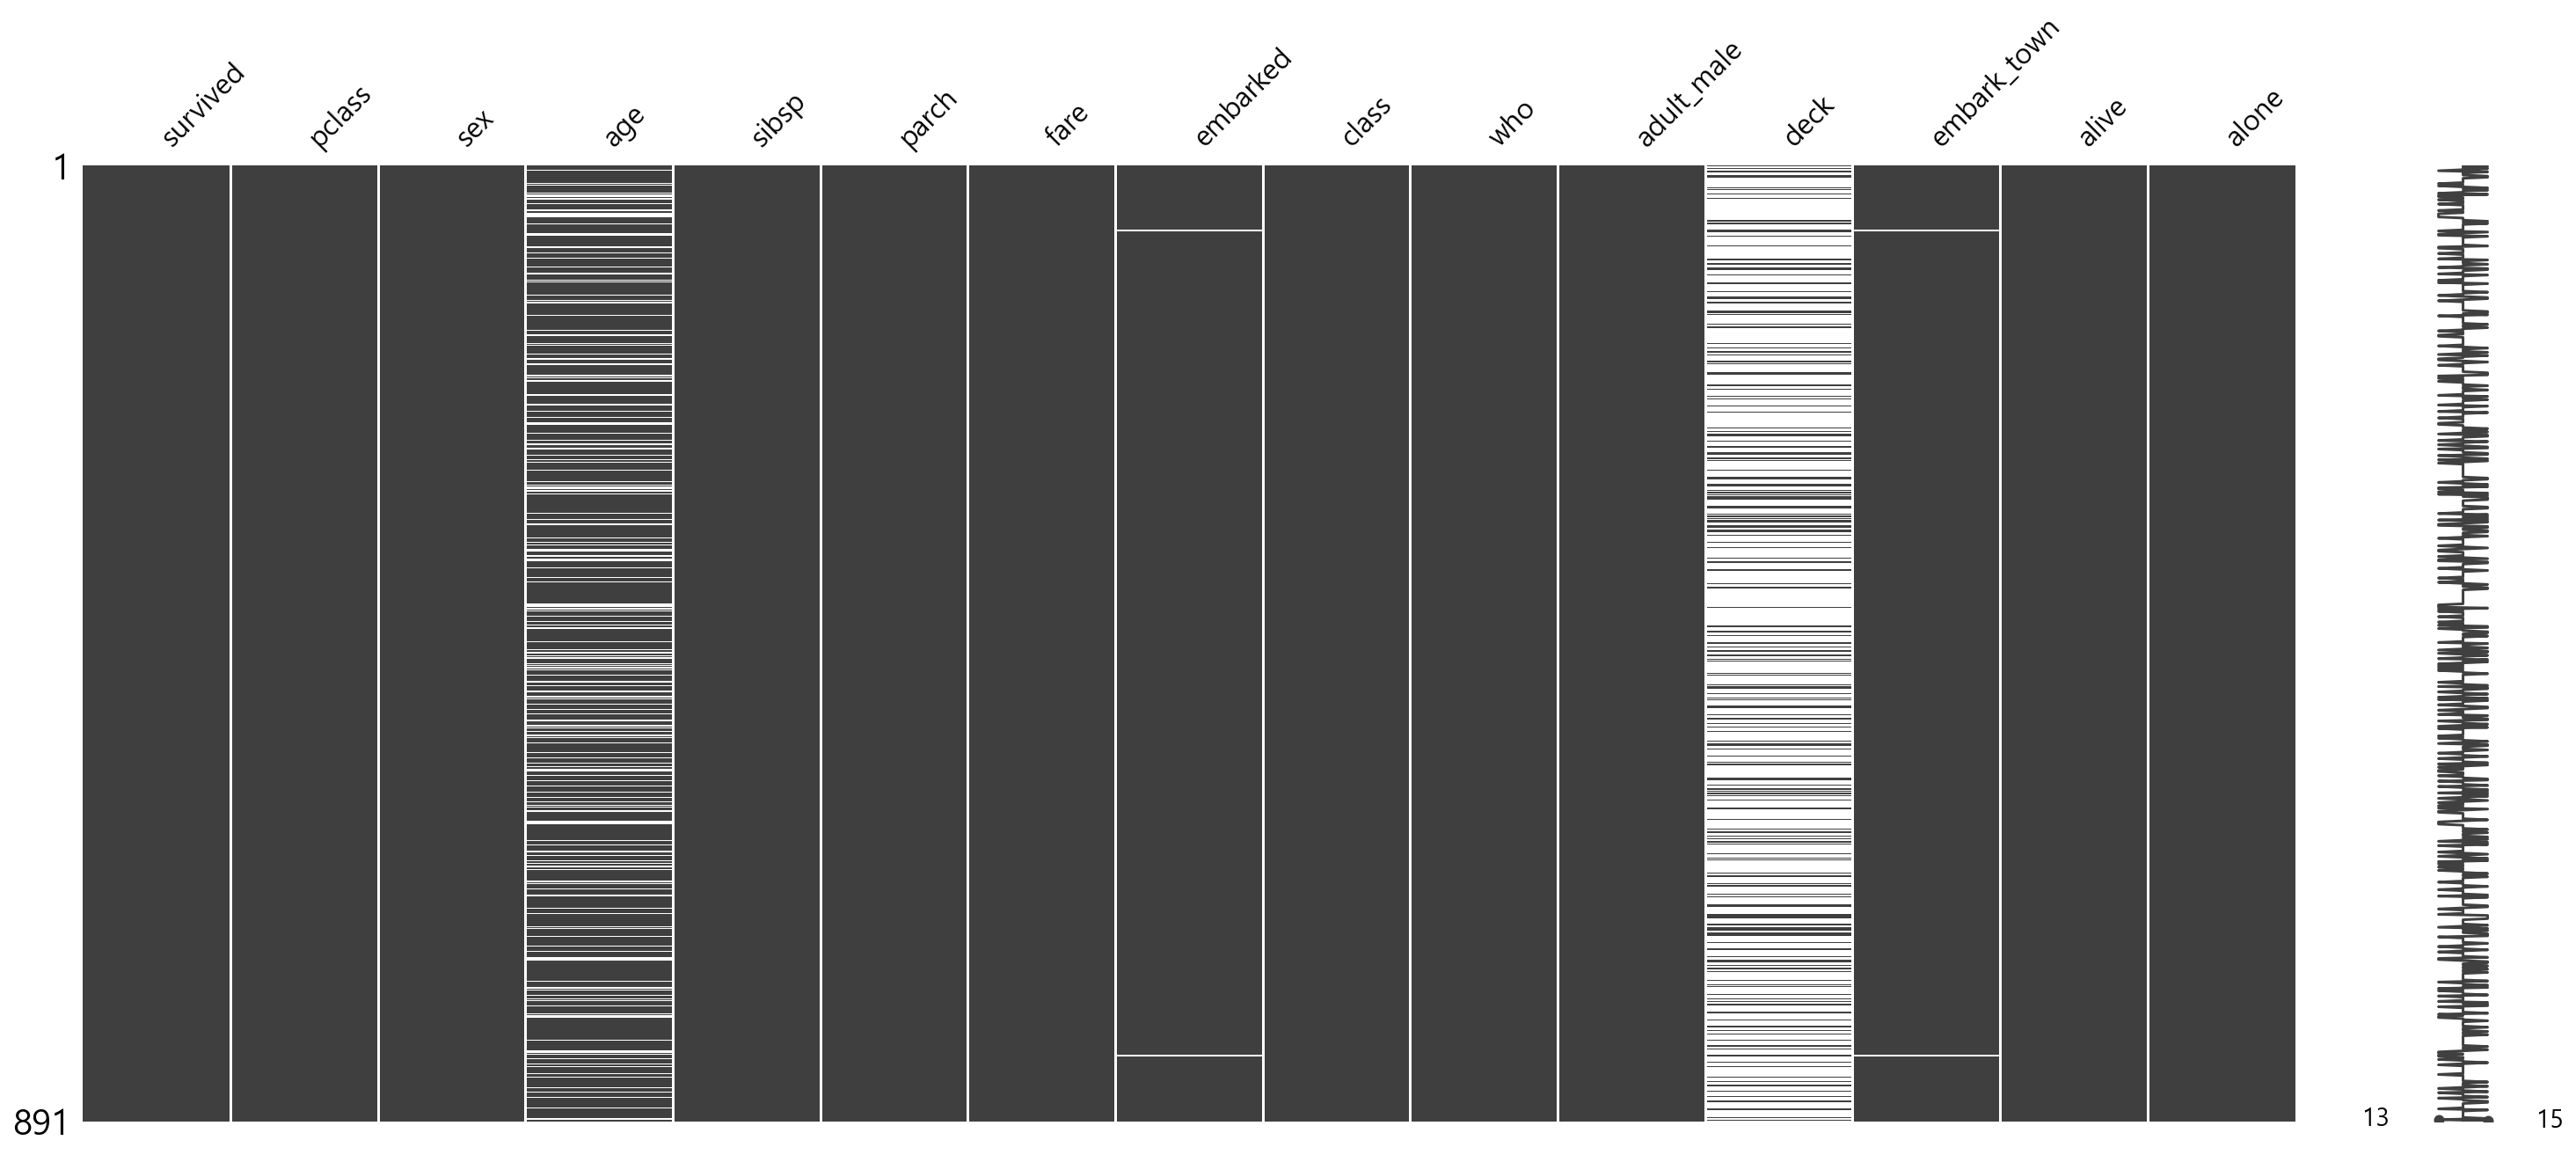

In [397]:
# 결측치 시각화

msno.matrix(titanic)

In [398]:
titanic.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [399]:
# embarked 변수는 결측치가 2개이므로 최빈값 S로 채워주도록 한다.

titanic.embarked = titanic.embarked.fillna('S')

seaborn에서 제공하는 Titanic Dataset은 총 891개의 행과 15개의 컬럼으로 이루어져 있습니다.

또한 결측치를 확인한 결과 `age: 177, embarked: 2, dec: 688, embark_town:2` 의 결측치가 존재합니다.

In [400]:
titanic.shape

(891, 15)

In [401]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [402]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

# Step 2. Preprocessing
---

현재 분석에 사용하는 타이타닉 데이터는 같은 내용을 의미하는 컬럼이 다수 존재합니다.

따라서 중복되는 내용이 들어있기에 해당 컬럼은 제외합니다.

### 중복 컬럼 제거

In [403]:
titanic = titanic.drop(['class','who','embark_town','alive'], axis=1)

In [404]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,True,NaN,False
1,1,1,female,38.0,1,0,71.2833,C,False,C,False
2,1,3,female,26.0,0,0,7.9250,S,False,NaN,True
3,1,1,female,35.0,1,0,53.1000,S,False,C,False
4,0,3,male,35.0,0,0,8.0500,S,True,NaN,True


### 카테고리형 변수 전처리

adult_male, alone등의 카테고리 데이터를 numeric한 변수로 변환합니다.

In [405]:
titanic['adult_male'] = titanic['adult_male'].astype('category').cat.codes
titanic['alone'] = titanic['alone'].astype('category').cat.codes

# step 3. add features
---

In [406]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,1,NaN,0
1,1,1,female,38.0,1,0,71.2833,C,0,C,0
2,1,3,female,26.0,0,0,7.9250,S,0,NaN,1
3,1,1,female,35.0,1,0,53.1000,S,0,C,0
4,0,3,male,35.0,0,0,8.0500,S,1,NaN,1


현재 타이타닉 데이터에는 새로운 피쳐들을 만들기 충분합니다. 따라서 다음과 같이 새로운 피쳐들을 추가합니다.

In [407]:
# 탑승한 가족 인원을 구한 family 컬럼 생성

titanic['family'] = 1 + titanic['sibsp'] + titanic['parch']
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,deck,alone,family
0,0,3,male,22.0,1,0,7.2500,S,1,NaN,0,2
1,1,1,female,38.0,1,0,71.2833,C,0,C,0,2
2,1,3,female,26.0,0,0,7.9250,S,0,NaN,1,1
3,1,1,female,35.0,1,0,53.1000,S,0,C,0,2
4,0,3,male,35.0,0,0,8.0500,S,1,NaN,1,1


### 연령층 컬럼 생성

In [408]:
titanic.loc[ titanic['age'] <= 10, 'age_clean'] = 0
titanic.loc[(titanic['age'] > 10) & (titanic['age'] <= 16), 'age_clean'] = 1
titanic.loc[(titanic['age'] > 16) & (titanic['age'] <= 20), 'age_clean'] = 2
titanic.loc[(titanic['age'] > 20) & (titanic['age'] <= 26), 'age_clean'] = 3
titanic.loc[(titanic['age'] > 26) & (titanic['age'] <= 30), 'age_clean'] = 4
titanic.loc[(titanic['age'] > 30) & (titanic['age'] <= 36), 'age_clean'] = 5
titanic.loc[(titanic['age'] > 36) & (titanic['age'] <= 40), 'age_clean'] = 6
titanic.loc[(titanic['age'] > 40) & (titanic['age'] <= 46), 'age_clean'] = 7
titanic.loc[(titanic['age'] > 46) & (titanic['age'] <= 50), 'age_clean'] = 8
titanic.loc[(titanic['age'] > 50) & (titanic['age'] <= 60), 'age_clean'] = 9
titanic.loc[ titanic['age'] > 60, 'age_clean'] = 10

### cut을 이용한 요금 구간 분할 

In [409]:
# pd.cut을 이용한 fare_class 컬럼 생성

titanic['fare_class'] = pd.cut(titanic.fare, 5)

In [410]:
titanic['fare_class'].value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: fare_class, dtype: int64

### fare_class 분포 확인

In [411]:
titanic.groupby('fare_class')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
fare_class,,,,,,,,
"(-0.512, 102.466]",838.0,22.411942,20.827218,0.0000,7.8958,13.0000,27.7208,93.5000
"(102.466, 204.932]",33.0,131.108200,18.800843,106.4250,113.2750,133.6500,151.5500,164.8667
"(204.932, 307.398]",17.0,238.187253,21.514399,211.3375,221.7792,227.5250,262.3750,263.0000
"(307.398, 409.863]",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(409.863, 512.329]",3.0,512.329200,0.000000,512.3292,512.3292,512.3292,512.3292,512.3292


### qcut을 이용한 연령층 분할

In [412]:
titanic['age_class'] = pd.qcut(titanic.age, 4, labels=['아동','청소년','청년','중년'])
titanic['fare_class'] = pd.cut(titanic.fare, 5)

### age_class 분포 확인

In [413]:
titanic.groupby('age_class')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
age_class,,,,,,,,
아동,179.0,12.651788,6.748741,0.42,6.0,16.0,18.0,20.0
청소년,183.0,24.374317,2.324156,20.50,22.0,24.0,26.0,28.0
청년,175.0,32.880000,2.787987,28.50,30.0,33.0,35.0,38.0
중년,177.0,49.299435,8.606495,39.00,42.0,48.0,54.0,80.0


### RandomFores Regressor를 통한 연령대 예측

In [415]:
titanic['age_class'].value_counts()

청소년    183
아동     179
중년     177
청년     175
Name: age_class, dtype: int64

In [422]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# age컬럼의 결측치를 0으로 채움
titanic['age'] = titanic["age"].fillna(0) 

# 0으로 채워진 데이터와 그렇지 않은 데이터를 분리시킨다.
titanic0 = titanic.loc[titanic['age'] == 0]
titanicNot0 = titanic.loc[titanic['age'] != 0]
print(titanic0.shape)
print(titanicNot0.shape)

titanic0_dummy_df = pd.get_dummies(titanic0)
titanicNot0_dummy_df = pd.get_dummies(titanicNot0)


# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(titanicNot0_dummy_df[['survived', 'pclass', 'sibsp', 'parch', 'fare', 'adult_male',
       'alone', 'family', 'sex_female', 'sex_male', 'embarked_C',
       'embarked_Q', 'embarked_S', 'deck_A', 'deck_B', 'deck_C', 'deck_D',
       'deck_E', 'deck_F', 'deck_G', 'age_class_아동', 'age_class_청소년',
       'age_class_청년', 'age_class_중년', 'fare_class_(-0.512, 102.466]',
       'fare_class_(102.466, 204.932]', 'fare_class_(204.932, 307.398]',
       'fare_class_(307.398, 409.863]', 'fare_class_(409.863, 512.329]']], titanicNot0_dummy_df.age, test_size=0.2)

# DecisionTreeRegressor Estimator 생성
dt_reg = DecisionTreeRegressor()

params = {'max_depth':[1, 2, 3, 4], 'min_samples_split':[2, 3, 4, 5]}

grid_dt = GridSearchCV(dt_reg, param_grid=params, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습 및 평가
grid_dt.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DF로 변환
scores_df = pd.DataFrame(grid_dt.cv_results_)
scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

(177, 15)
(714, 15)


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.590941,13,0.591251,0.598730,0.582842
1,"{'max_depth': 1, 'min_samples_split': 3}",0.590941,13,0.591251,0.598730,0.582842
2,"{'max_depth': 1, 'min_samples_split': 4}",0.590941,13,0.591251,0.598730,0.582842
3,"{'max_depth': 1, 'min_samples_split': 5}",0.590941,13,0.591251,0.598730,0.582842
4,"{'max_depth': 2, 'min_samples_split': 2}",0.787769,9,0.792002,0.779867,0.791437
5,"{'max_depth': 2, 'min_samples_split': 3}",0.787769,9,0.792002,0.779867,0.791437
6,"{'max_depth': 2, 'min_samples_split': 4}",0.787769,9,0.792002,0.779867,0.791437
7,"{'max_depth': 2, 'min_samples_split': 5}",0.787769,9,0.792002,0.779867,0.791437
8,"{'max_depth': 3, 'min_samples_split': 2}",0.855910,5,0.866806,0.844571,0.856353
9,"{'max_depth': 3, 'min_samples_split': 3}",0.855910,5,0.866806,0.844571,0.856353


### GridSearchCV

In [423]:
print('GridSearchCV 최적 파라미터:', grid_dt.best_params_)
print('GridSearchCV 최고 정확도:', grid_dt.best_score_)

GridSearchCV 최적 파라미터: {'max_depth': 4, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8645243971601255


### RMSE

In [425]:
from sklearn.metrics import mean_squared_error

rf_prediction = grid_dt.predict(X_test[['survived', 'pclass', 'sibsp', 'parch', 'fare', 'adult_male',
       'alone', 'family', 'sex_female', 'sex_male', 'embarked_C',
       'embarked_Q', 'embarked_S', 'deck_A', 'deck_B', 'deck_C', 'deck_D',
       'deck_E', 'deck_F', 'deck_G', 'age_class_아동', 'age_class_청소년',
       'age_class_청년', 'age_class_중년', 'fare_class_(-0.512, 102.466]',
       'fare_class_(102.466, 204.932]', 'fare_class_(204.932, 307.398]',
       'fare_class_(307.398, 409.863]', 'fare_class_(409.863, 512.329]']])

rf_mse = mean_squared_error(y_test, rf_prediction)
rf_rmse = np.sqrt(rf_mse)
print(rf_rmse)

4.5645032414732905


In [426]:
titanic0Values = grid_dt.predict(titanic0_dummy_df[['survived', 'pclass', 'sibsp', 'parch', 'fare', 'adult_male',
       'alone', 'family', 'sex_female', 'sex_male', 'embarked_C',
       'embarked_Q', 'embarked_S', 'deck_A', 'deck_B', 'deck_C', 'deck_D',
       'deck_E', 'deck_F', 'deck_G', 'age_class_아동', 'age_class_청소년',
       'age_class_청년', 'age_class_중년', 'fare_class_(-0.512, 102.466]',
       'fare_class_(102.466, 204.932]', 'fare_class_(204.932, 307.398]',
       'fare_class_(307.398, 409.863]', 'fare_class_(409.863, 512.329]']])

In [427]:
titanic0["age"] = titanic0Values.astype(int)
full_age_df = titanic0.append(titanicNot0)
titanic['age']=full_age_df['age']

### 연령층 컬럼 생성

In [428]:
titanic.loc[ titanic['age'] <= 10, 'age_clean'] = 0
titanic.loc[(titanic['age'] > 10) & (titanic['age'] <= 16), 'age_clean'] = 1
titanic.loc[(titanic['age'] > 16) & (titanic['age'] <= 20), 'age_clean'] = 2
titanic.loc[(titanic['age'] > 20) & (titanic['age'] <= 26), 'age_clean'] = 3
titanic.loc[(titanic['age'] > 26) & (titanic['age'] <= 30), 'age_clean'] = 4
titanic.loc[(titanic['age'] > 30) & (titanic['age'] <= 36), 'age_clean'] = 5
titanic.loc[(titanic['age'] > 36) & (titanic['age'] <= 40), 'age_clean'] = 6
titanic.loc[(titanic['age'] > 40) & (titanic['age'] <= 46), 'age_clean'] = 7
titanic.loc[(titanic['age'] > 46) & (titanic['age'] <= 50), 'age_clean'] = 8
titanic.loc[(titanic['age'] > 50) & (titanic['age'] <= 60), 'age_clean'] = 9
titanic.loc[ titanic['age'] > 60, 'age_clean'] = 10

### qcut을 이용한 연령층, cut을 이용한 요금 구간 분할 

In [429]:
titanic['age_class'] = pd.qcut(titanic.age, 4, labels=['아동','청소년','청년','중년'])

In [430]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'adult_male', 'deck', 'alone', 'family', 'age_clean',
       'fare_class', 'age_class'],
      dtype='object')

### age_class 분포 확인

In [431]:
titanic['age_class'].value_counts()

청소년    362
아동     231
중년     217
청년      81
Name: age_class, dtype: int64

# Step 3. Visualization
----

In [432]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,deck,alone,family,age_clean,fare_class,age_class
0,0,3,male,22.0,1,0,7.2500,S,1,NaN,0,2,3.0,"(-0.512, 102.466]",아동
1,1,1,female,38.0,1,0,71.2833,C,0,C,0,2,6.0,"(-0.512, 102.466]",중년
2,1,3,female,26.0,0,0,7.9250,S,0,NaN,1,1,3.0,"(-0.512, 102.466]",청소년


### 연령대 히스토그램

In [881]:
female = titanic.loc[titanic.sex =='female']
male = titanic.loc[titanic.sex =='male']

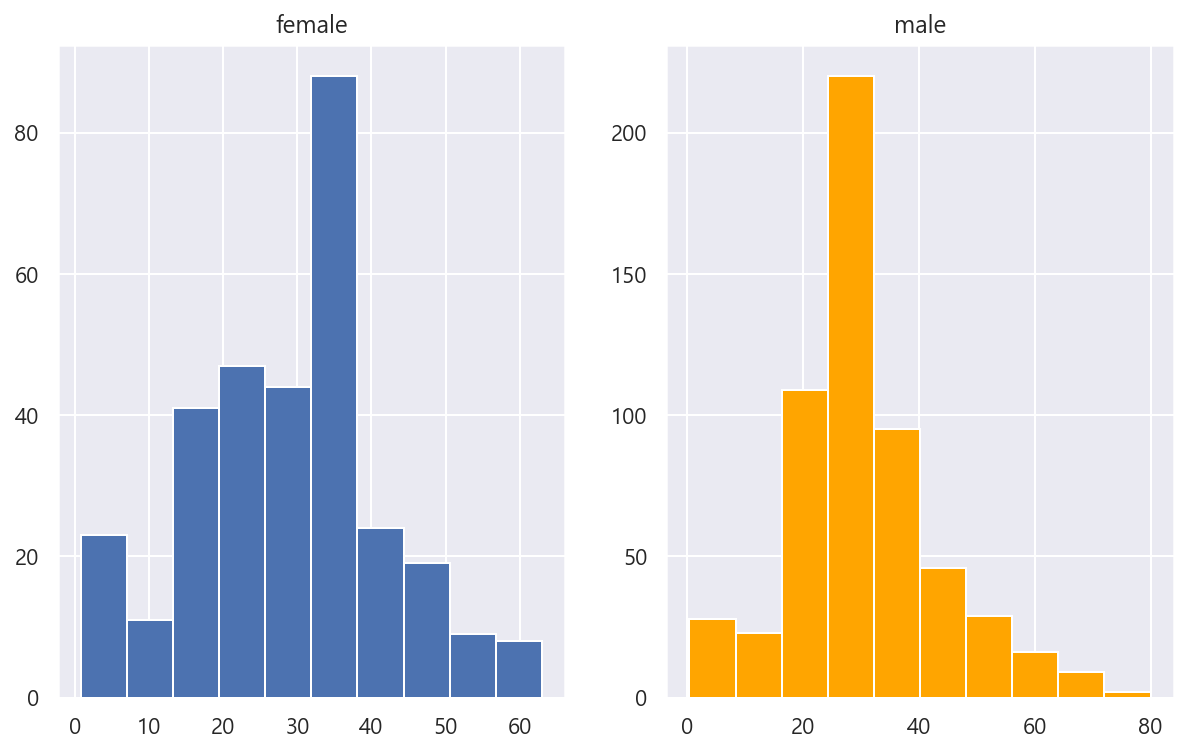

In [894]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.title("female")
plt.hist(female.age, bins=10)

plt.subplot(122)
plt.title("male")
plt.hist(male.age, bins=10, color='orange')
plt.show()

- 타이타닉에는 여성의 경우 30대에서 40대가 가장 많이 분포하고있다.
- 남성의 경우 20대와 40대에 많은 인원이 분포하며 가장 많은 분포를 차지하는 연령대는 30대로 확인된다.

### 남여 생존 비율

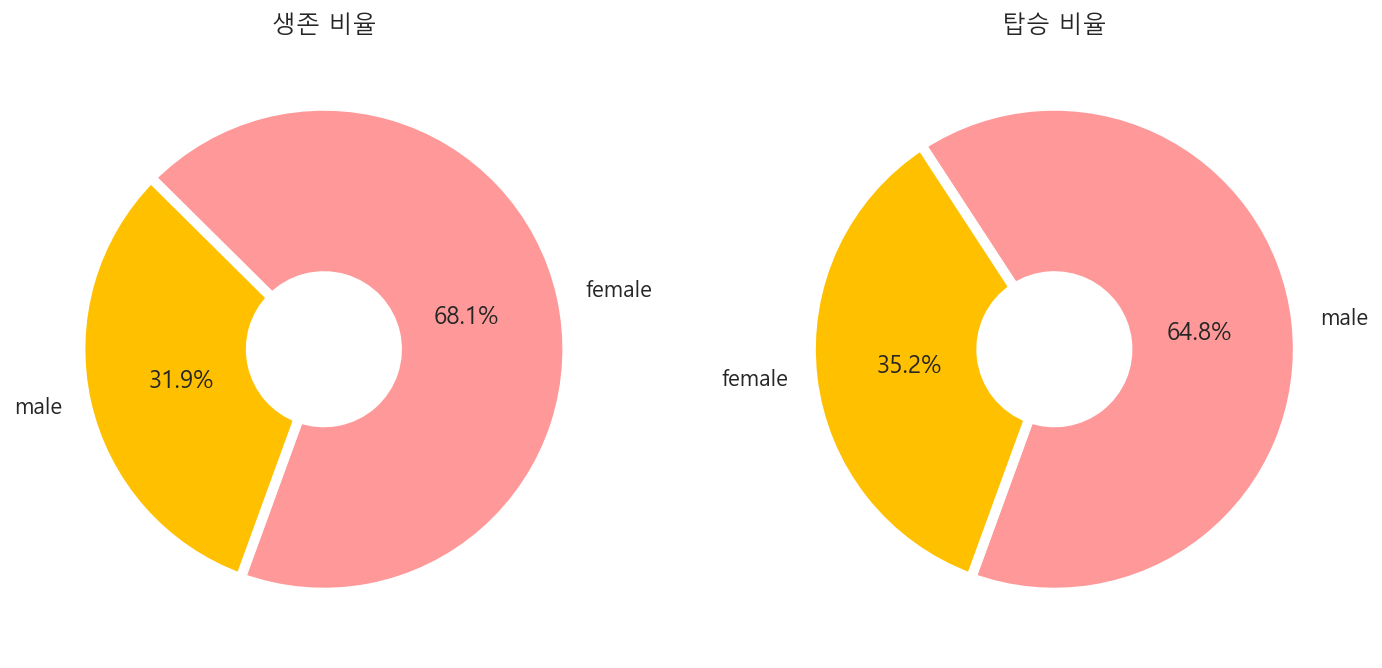

In [905]:
plt.figure(figsize=(12, 8))

plt.subplot(121)

plt.title('생존 비율')
ratio = titanic.loc[titanic['survived']==1].sex.value_counts()
labels = titanic.loc[titanic['survived']==1].sex.unique()

colors = ['#ff9999', '#ffc000']
wedgeprops = {'width':0.7, 'edgecolor':'w', 'linewidth':5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=250, counterclock=True,
       colors=colors, wedgeprops=wedgeprops)

plt.subplot(122)

plt.title('탑승 비율')
ratio = titanic.sex.value_counts()
labels = titanic.sex.unique()
colors = ['#ff9999', '#ffc000']
wedgeprops = {'width':0.7, 'edgecolor':'w', 'linewidth':5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=250, counterclock=True,
       colors=colors, wedgeprops=wedgeprops)
plt.show()

- 남녀 탑승 비율을 살펴보면 남성이 64.8%로 약 2/3에 해당하는 인원이 남성임을 알 수 있다.
- 하지만 생존 비율을 살펴보면 완전히 역으로 바뀐것을 알 수 있다.
- 지금까지의 시각화를 통해 얻은 인사이트는 타이타닉에 탑승한 인원은 전체 성별을 통틀어 20대에서 40대가 가장 많았고 탑승 비율은 남성이 2/3를 차지했지만 생존 비율은 여성이 2/3를 차지한 것으로 확인된다.


- `따라서 타이타닉 침몰 사건 당시 성별이 생존 여부에 큰 영향을 미친것으로 파악되며 성별에 초점을 맞추어 분석을 진행하자.`

### Pclass별 남녀 생존율 비교

In [704]:
grouped_titanic = titanic.groupby(['pclass','sex'])['survived']
grouped_titanic_pclass = pd.DataFrame(grouped_titanic.mean())
grouped_titanic_pclass.reset_index(inplace=True)
grouped_titanic_df_female = grouped_titanic_pclass.loc[(grouped_titanic_pclass['sex']=='female')]
grouped_titanic_df_male = grouped_titanic_pclass.loc[(grouped_titanic_pclass['sex']=='male')]
grouped_titanic_df_female=grouped_titanic_df_female.groupby('pclass').mean()
grouped_titanic_df_male=grouped_titanic_df_male.groupby('pclass').mean()

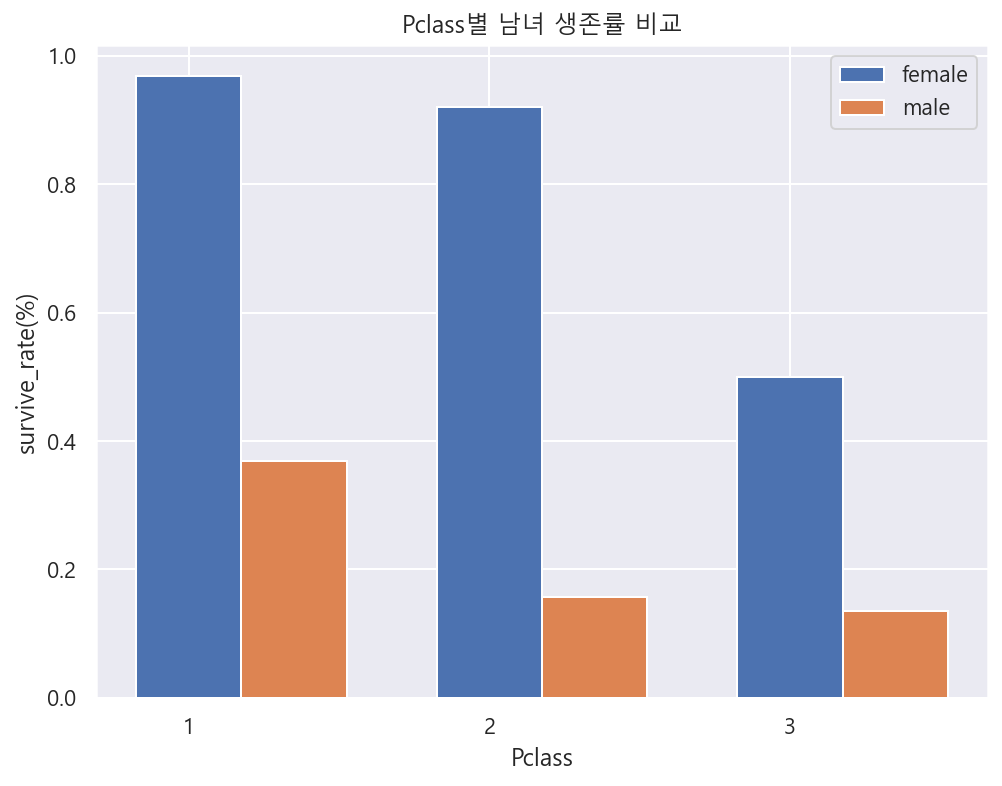

In [744]:
plt.figure(figsize=(8, 6))

bar_width = 0.35

plt.bar(grouped_titanic_df_female.index, grouped_titanic_df_female.survived, bar_width, label='female')
plt.bar(grouped_titanic_df_female.index+ bar_width, grouped_titanic_df_male.survived, bar_width, label='male')
plt.title('Pclass별 남녀 생존률 비교')
plt.ylabel('survive_rate(%)')
plt.xlabel('Pclass')
plt.xticks(np.arange(1,4))
plt.legend()
plt.show()

- Pclass별 생존여부를 확인해보면 모든 선실에서 여성의 생존율이 가장 높았지만 1번 선실의 경우 거의 100%에 가까운 생존율을 보인다.


- 따라서 여성이면서 객실 등급이 높았던 인원의 생존율이 높았다고 볼 수 있다.

### 연령대별 남녀 생존율 비교

In [866]:
grouped_titanic = titanic.groupby(['age_clean','pclass','sex'])['survived']
grouped_titanic_df = pd.DataFrame(grouped_titanic.mean())
grouped_titanic_df.reset_index(inplace=True)
grouped_titanic_df_female = grouped_titanic_df.loc[(grouped_titanic_df['sex']=='female')]
grouped_titanic_df_male = grouped_titanic_df.loc[(grouped_titanic_df['sex']=='male')]
grouped_titanic_df_female=grouped_titanic_df_female.groupby('age_clean').mean()
grouped_titanic_df_male=grouped_titanic_df_male.groupby('age_clean').mean()

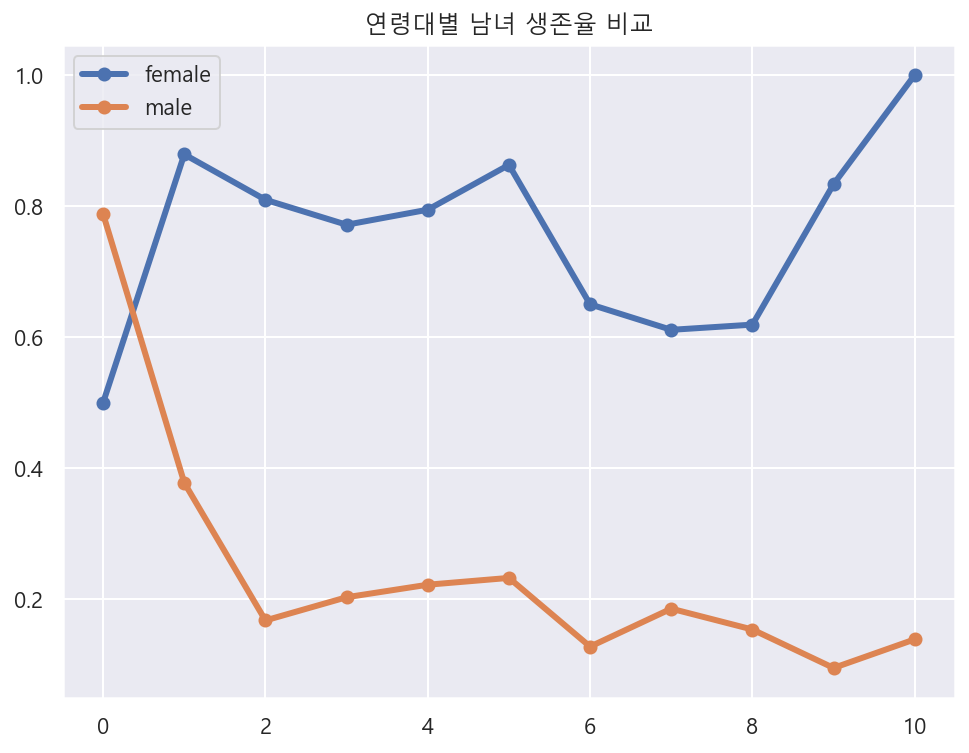

In [867]:
plt.figure(figsize=(8,6))
plt.title('연령대별 남녀 생존율 비교')
plt.plot(grouped_titanic_df_female.index, grouped_titanic_df_female.survived,
        linewidth=3, marker='o', label='female')
plt.plot(grouped_titanic_df_male.index, grouped_titanic_df_male.survived,
        linewidth=3, marker='o', label='male')
plt.legend(loc='upper left')

plt.show()

In [914]:
# 각 age_clea 별 평균 연령대

pd.DataFrame(titanic.groupby('age_clean')['age'].mean()).transpose()

age_clean,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
age,4.268281,14.652778,18.531646,23.389286,28.588889,32.803136,38.722222,43.326923,48.5,54.892857,66.022727


- 이어서 age_class 변수를 이용해 연령대별 남녀 생존율을 비교해보자.
- 여성의 경우 전체적으로 생존율이 높지만 특히 높은 구간은 1에서 5이다. 즉, 약 14세에서 32세 사이의 여성들이 우선적으로 구출되었음을 짐작할 수 있다.
- 그리고 8 구간에서 생존율이 높고 해당 연령대는 약 50세 이상인 노인으로 파악된다.


- 남성의 경우 18세 미만의 미성년자는 다른 연령대에 비해 비교적 생존율이 높지만 나머지 생존율은 20% 안팎인 것을 확인할 수 있다.